<a href="https://colab.research.google.com/github/cemvardar/GurobiExamples/blob/master/time_vs_ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

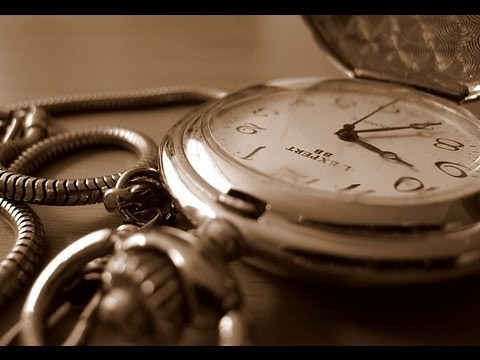

In [1]:
#@title
from IPython.display import YouTubeVideo
YouTubeVideo('f1vXAHGIpfc')

# Imports and Needed Methods


In [0]:
import pandas as pd
import numpy as np
from random import random
from mpmath import mpf, mp
import mpmath
import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from collections import defaultdict
from IPython.display import HTML, display
import time

In [0]:
# https://www.youtube.com/watch?v=f1vXAHGIpfc&t=500s
# https://github.com/cemvardar/simulations_with_colab
# https://docs.google.com/document/d/1AtfB1tTgCJEW4yGZjZOU8R39aRDko1kB2j7F6XNNhvA/edit

In [0]:
class OlePetersGame():
    def __init__(self, win_rate, win_reward_percent, lose_reward_percent):
        self.win_rate = win_rate
        self.win_reward_percent = win_reward_percent
        self.lose_reward_percent = lose_reward_percent
    
    def win(self, random_variate):
        if random_variate > self.win_rate:
            return True
        return False       

    def bet_net_result(self, bet_amount):
        if self.win(random()):
            return bet_amount * self.win_reward_percent
        return -(bet_amount * self.lose_reward_percent)

    def get_odds(self):
        return (self.win_reward_percent+ self.lose_reward_percent)/self.lose_reward_percent

    def get_kelly_ratio(self):
        numerator = self.win_rate * self.get_odds() - 1
        denominator = self.get_odds() - 1
        return numerator/denominator

    def get_kelly_bet_ratio(self):
        return self.get_kelly_ratio()/self.lose_reward_percent

In [0]:
def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))

class GameSimulator():
    def __init__(self, opg):
        self.opg = opg

    def run_path(self, bankroll, iterations, bet_ratio=1):
        results = []
        for i in range(iterations):
            bet_amount = bankroll * bet_ratio
            bankroll += self.opg.bet_net_result(bet_amount)
            results.append(bankroll)
        return np.array(results)

    def play_the_game(self, iterations, bankroll=100, bet_ratio=1):
        result = self.run_path(bankroll, iterations,  bet_ratio)
        return result

    def run_sequences(self, bankroll, number_of_seqeunces, iterations):
        running_results = np.array(np.zeros(iterations))
        for i in range(number_of_seqeunces):
            running_results += self.run_path(100, iterations)
        average_of_iterations =running_results/number_of_seqeunces
        return average_of_iterations

    def run_path_high_precision(self, bankroll, iterations, bet_ratio=1):
        results = []
        bankroll = mpf(bankroll)
        bet_ratio = mpf(bet_ratio)
        for i in range(iterations):
            bet_amount = bankroll * bet_ratio
            bankroll += self.opg.bet_net_result(bet_amount)
            results.append(bankroll)
        return np.array(results)

    def get_time_perspective(self, days, bet_ratio=1):
        bankroll = 100
        number_of_seqeunces = 1
        iterations = 24 * 60 * days
        average_of_iterations=self.run_path_high_precision(bankroll, iterations,  bet_ratio)
        reduced_iterations = average_of_iterations[0::int(iterations/50)]
        a = [mpmath.log(x,10) for x in reduced_iterations]
        x  = np.array(range(len(a))) * days / 50
        return x, a

In [0]:
def get_plot_time_perspective(ax, x_axis, x_series, ylimit = None, color='r', label=None):
    ax.plot(x_axis, x_series, 'r', linewidth=3.3, color=color, label=label)
    # ax.set_yscale('log')
    ax.set_xlabel("days")
    ax.set_ylabel("money in $10^x$", fontsize=18)
    def get_ylimit_adaptive(x_series):
        limit = abs(float(x_series[-1]+0.2*x_series[-1]))
        return [-limit, limit]
    if ylimit is None:
        ylimit=get_ylimit_adaptive(x_series)
    ax.set_ylim(ylimit)
    ax.set_title("Time perspective")

def get_plot_ensemble(ax, x_series): 
    x  = np.array(range(len(x_series)))
    y1 = x_series
    ax.plot(x, y1, 'r', linewidth=3.3)
    ax.plot()
    ax.set_yscale('log')
    ax.set_xlabel("Time in minutes")
    ax.set_ylabel("money in $", fontsize=18)
    ax.set_ylim(1, 20000)
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.set_title("Ensemble Perspective")

def play_the_game_and_plot_it(axes, simulator, iterations):
    result = simulator.play_the_game(iterations)
    # fig, axes = plt.subplots()
    a = axes.plot(range(iterations+1), [100]+list(result), color ='r')
    axes.axhline(y=100, xmin=0.0, xmax=1.0, color='b')

# Playground

In [27]:
from ipywidgets import interactive, interact_manual
import matplotlib.pyplot as plt
import numpy as np

win_rate=0.5
win_reward_percent = 0.5
lose_reward_percent = 0.4
opg = OlePetersGame(win_rate, win_reward_percent, lose_reward_percent)
kelly_ratio = opg.get_kelly_ratio()
bet_ratio = opg.get_kelly_bet_ratio()

iterations = 15
simulator = GameSimulator(opg)

def f(iterations):
    fig, axes = plt.subplots()
    play_the_game_and_plot_it(axes, simulator, iterations)

interactive_plot = interact_manual(f, iterations=(5, 100, 5))
# output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot.widget.children[1].description = 'changed'
interact_manual?

interactive(children=(IntSlider(value=50, description='iterations', min=5, step=5), Button(description='Run In…

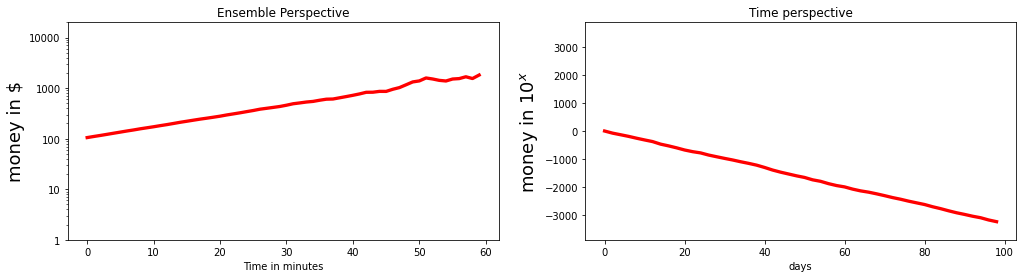

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(17, 4))
bankroll = 100
number_of_seqeunces = 100000
iterations = 60

win_rate=0.5
win_reward_percent = 0.5
lose_reward_percent = 0.4
opg = OlePetersGame(win_rate, win_reward_percent, lose_reward_percent)
simulator = GameSimulator(opg)

average_of_iterations=simulator.run_sequences(bankroll, number_of_seqeunces, iterations)
get_plot_ensemble(axes[0], average_of_iterations)
x_axis, x_series = simulator.get_time_perspective(100)
get_plot_time_perspective(axes[1], x_axis, x_series)


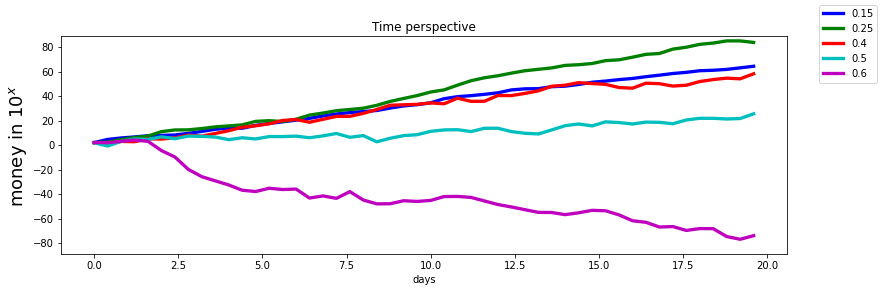

In [18]:
# test different bet ratios
def plot_bet_ratio_line(axes, simulator, game_length, bet_ratio, color):
    x_axis, x_series = simulator.get_time_perspective(game_length, bet_ratio)
    get_plot_time_perspective(axes, x_axis, x_series, color = color, label = bet_ratio)    

def plot_bet_different_bet_ratios(game_length_in_days, bet_ratios):
    fig, axes = plt.subplots(1, 1, figsize=(13, 4))
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    simulator = GameSimulator(opg)
    for bet_ratio, color in zip(bet_ratios, colors[:len(bet_ratios)]):
        plot_bet_ratio_line(axes, simulator, game_length_in_days, bet_ratio, color)
    fig.legend()


game_length_in_days = 20
bet_ratios = [0.15, 0.25, 0.4, 0.5, 0.6]
plot_bet_different_bet_ratios(game_length_in_days, bet_ratios)

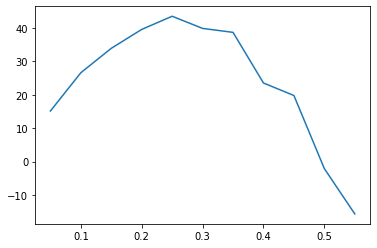

In [10]:
from collections import defaultdict
bet_ratio_search_space = np.arange(0.05,0.6, 0.05)
game_length = 10
replications = 10
simulator = GameSimulator(opg)
result_dict = defaultdict(float)
out = display(progress(0, replications-1), display_id=True)
for i in range(replications):
    result_list = []
    for bet_ratio in bet_ratio_search_space:
        x_axis, x_series = simulator.get_time_perspective(game_length, bet_ratio)
        result_list.append(x_series[49])
        result_dict[bet_ratio] += x_series[49]
    out.update(progress(i, replications-1))

fig, axes = plt.subplots()
axes.plot(bet_ratio_search_space, [r/replications for r in result_dict.values()])

In [11]:
population = np.ones(1000000)*100
population_collection = [population]
out = display(progress(0, 59), display_id=True)
for i in range(60):
    population = np.array([x+opg.bet_net_result(x) for x in population])
    population_collection.append(population)
    out.update(progress(i, 59))


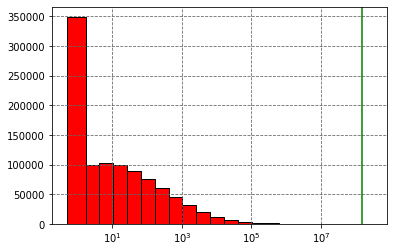

In [12]:
def get_x_y_for_plot(population):
    population = np.round(population, 2)
    counter = defaultdict(int)
    for i in population:
        if i<1:
            counter[0.5]+=1
        else:
            counter[i]+=1
    x = []
    y = []
    for i, j in sorted(counter.items()):
        x.append(i)
        y.append(j)

    return x, y
x, y = get_x_y_for_plot(population)
fig, ax = plt.subplots()
width = list(np.diff(x))
width = width + width[-1:]
ax.bar(x, y, width=width, ec="k", align="edge", color ='r')
ax.grid(b=True, which='major', color='#666666', linestyle='--')
ax.set_xscale("log")
plt.axvline(max(population), color='g')
plt.show()

In [13]:
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from datetime import datetime

fig, axes = plt.subplots()
out = display(progress(0, 59), display_id=True)

def init():
    pass

def animate(i):
    plt.cla()
    x, y = get_x_y_for_plot(population_collection[i])
    width = list(np.diff(x))
    width = width + width[-1:]
    axes.bar(x, y, width=width, ec="k", align="edge", label = i, color = 'r')
    axes.set_xscale('log')
    axes.set_ylim([0,500000])
    axes.set_xlim([0.3,1000000000])
    # axes.vlines(max(population_collection[i]), 0, max(y), colors='g')
    plt.axvline(max(population_collection[i]), color='g')
    fig.legend()
    out.update(progress(i, 59))

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=60,interval=30)
a = rc('animation', html='jshtml')
display(anim)
plt.close()

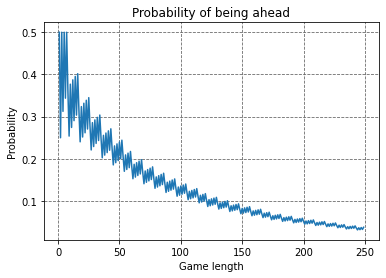

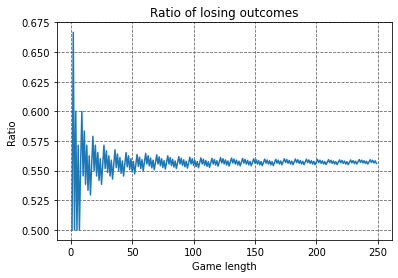

In [14]:
# contribution math
from math import pow
from scipy.stats import binom
import pandas as pd

def get_return_table(iterations, bankroll = 100):
    possibilities = range(iterations+1)
    probabilities = binom.pmf(possibilities, iterations, win_rate)
    result_list = []
    for i in range(iterations+1):
        result = bankroll * ((1+win_reward_percent)**i) * (1- lose_reward_percent)**(iterations-i)
        ev_contribution = probabilities[i] * (result - bankroll) 
        # print(result, probabilities[i], ev_contribution)
        result_list.append([result, probabilities[i], ev_contribution])
    df = pd.DataFrame(result_list)
    return df
bankroll = 100
iterations = 250
results = []
share_of_losing_outcomes = []
for i in range(1,iterations):
    df = get_return_table(i)
    prob_up = df[df[2]>0][1].sum()
    prob_down = df[df[2]<0][1].sum()
    results.append(prob_up)
    share_of_losing_outcome = min(df[df[2]>0].index)/len(df)
    share_of_losing_outcomes.append(share_of_losing_outcome)

fig, axes = plt.subplots()
axes.plot(range(1,iterations), results)
axes.set_title('Probability of being ahead')
axes.set_xlabel('Game length')
axes.set_ylabel('Probability')
axes.grid(b=True, which='major', color='#666666', linestyle='--')

fig, axes = plt.subplots()
axes.plot(range(1,iterations), share_of_losing_outcomes)
axes.set_title('Ratio of losing outcomes')
axes.set_xlabel('Game length')
axes.set_ylabel('Ratio')
axes.grid(b=True, which='major', color='#666666', linestyle='--')


In [16]:
fig, axes = plt.subplots()

steps =[10, 20, 50, 100, 250, 500, 750, 1000]
steps =np.arange(50,1000,50)

def init():
    pass

def animate(i):
    plt.cla()
    df = get_return_table(steps[i])
    profit_cutoff = min(df[df[2]>0].index)

    axes.plot(df[1], color ='r', label='pdf')
    axes.fill_between(range(profit_cutoff,len(df)), df[profit_cutoff:][1])
    axes.text(0.6 * len(df), max(df[1])/2, 'n=%d p(being ahead)= %.4f'% (len(df)-1, df[profit_cutoff:][1].sum()))

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(steps),interval=30)
a = rc('animation', html='jshtml')
display(anim)
plt.close()


Text(0.5, 0, 'Number of wins=losses')

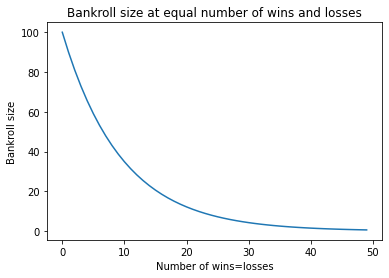

In [17]:
equal_win_loss_result = []
for i in range(50):
    result = 100 * ((1+win_reward_percent)**i) * (1- lose_reward_percent)**(i)
    equal_win_loss_result.append(result)

fig, axes = plt.subplots()
axes.plot(equal_win_loss_result)
axes.set_title('Bankroll size at equal number of wins and losses')
axes.set_ylabel('Bankroll size')
axes.set_xlabel('Number of wins=losses')

In [0]:
# simple taska
# - fix the titles and axis labels of the time vs ensemble plots
# - refactor run path methods into a class
# - test different lose ratios for verifying the kelly calculation

# tasks:
# - verify the zigzag pattern
# - do a question on the zigzag pattern
# - explore different versions of the game

# soft tasks
# question about ergodicity metric
# understand how the expectation is different when the lose penalty is lower.



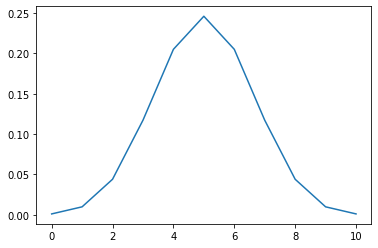

In [19]:
iterations = 10
probabilities = binom.pmf(range(iterations+1), iterations, 0.5)
fig, axes = plt.subplots()
axes.plot(probabilities)